![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

# Research to Production
## Random Forest Regression
---------
### Introduction
This notebook explains how to you can use the Research Environment to develop and test a Random Forest Regression hypothesis, then put the hypothesis in production.

<a href="https://www.quantconnect.com/docs/v2/research-environment/tutorials/research-to-production/random-forest-regression">Documentation</a>

### Create Hypothesis
We've assumed the price data is a time series with some auto regressive property (i.e. its expectation is related to past price information). Therefore, by using previous price information, we could predict the next price level. One way to do so is by Random Forest Regression, which is a supervised machine learning algorithm where its weight and bias is decided in non-linear hyperdimension.

### Prerequisites
If you use Python, you must understand how to work with pandas DataFrames and Series. If you are not familiar with pandas, refer to the <a href="https://pandas.pydata.org/docs/">pandas documentation</a>.

### Import Packages
We'll need to import packages to help with data processing and machine learning. Import sklearn, numpy and matplotlib packages by the following:

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

### Get Historical Data
To begin, we retrieve historical data for research.

In [2]:
# Instantiate a QuantBook.
qb = QuantBook()

# Select the desired tickers for research.
symbols = {}
assets = ["SHY", "TLT", "SHV", "TLH", "EDV", "BIL",
          "SPTL", "TBT", "TMF", "TMV", "TBF", "VGSH", "VGIT",
          "VGLT", "SCHO", "SCHR", "SPTS", "GOVT"]

# Call the AddEquity method with the tickers, and its corresponding resolution. Then store their Symbols. Resolution.Minute is used by default. 
for i in range(len(assets)):
    symbols[assets[i]] = qb.AddEquity(assets[i],Resolution.Minute).Symbol

# Call the History method with qb.Securities.Keys for all tickers, time argument(s), and resolution to request historical data for the symbol.
history = qb.History(qb.Securities.Keys, datetime(2020, 1, 1), datetime(2022, 1, 1), Resolution.Daily)
history

close       high        low       open  \
symbol            time                                                     
VGLT UHVG8V7B7YAT 2020-01-03  80.754856  81.014394  80.504930  80.504930   
                  2020-01-04  81.956422  82.004485  81.273933  81.495021   
                  2020-01-07  81.562309  82.331311  81.475796  82.331311   
                  2020-01-08  81.129745  81.617100  81.129745  81.475796   
                  2020-01-09  80.668343  81.504633  80.379967  81.331608   
...                                 ...        ...        ...        ...   
VGSH UHVG8V7B7YAT 2021-12-28  60.800000  60.800000  60.785000  60.800000   
                  2021-12-29  60.790000  60.810000  60.790000  60.800000   
                  2021-12-30  60.790000  60.810000  60.790000  60.800000   
                  2021-12-31  60.830000  60.830000  60.800000  60.810000   
                  2022-01-01  60.830000  60.845000  60.820000  60.840000   

                                 volume  
symbol            time                   
VGLT UHVG8V7B7YAT 2020-01-03   440469.0  
                  2020-01-04   341293.0  
                  2020-01-07   271177.0  
                  2020-01-08   303897.0  
                  2020-01-09   304215.0  
...                                 ...  
VGSH UHVG8V7B7YAT 2021-12-28  3890421.0  
                  2021-12-29  1613925.0  
                  2021-12-30  1909032.0  
                  2021-12-31  1432094.0  
                  2022-01-01  1439863.0  

[9090 rows x 5 columns]

### Preparing Data
We'll have to process our data as well as build the ML model before testing the hypothesis. Our methodology is to use fractional differencing price data as input data in order to (1) provide stationarity, and (2) retain variance of the previous price information. We assume d=0.5 is the right balance to do so.

In [3]:
# Select the close column and then call the unstack method.
df = history['close'].unstack(level=0)

# Feature engineer the data for input.
input_ = df.diff() * 0.5 + df * 0.5
input_ = input_.iloc[1:]

# Shift the data for 1-step backward as training output result.
output = df.shift(-1).iloc[:-1]

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(input_, output, test_size = 0.2, random_state = 1990)

# Initialize a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, random_state = 1990)

# Fit the regressor
regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, random_state=1990)

### Test the Hypothesis
We would test the performance of this ML model to see if it could predict 1-step forward price precisely. To do so, we would compare the predicted and actual prices.

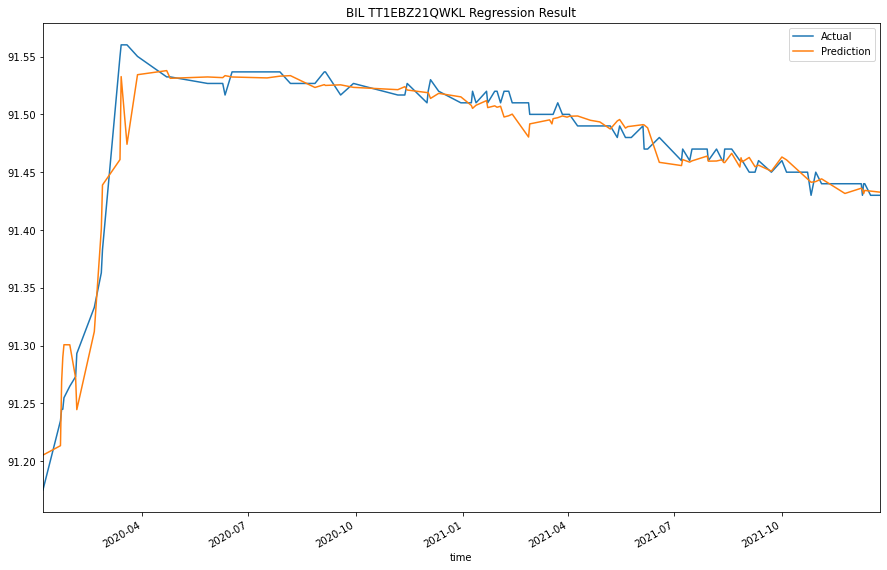

<Figure size 432x288 with 0 Axes>

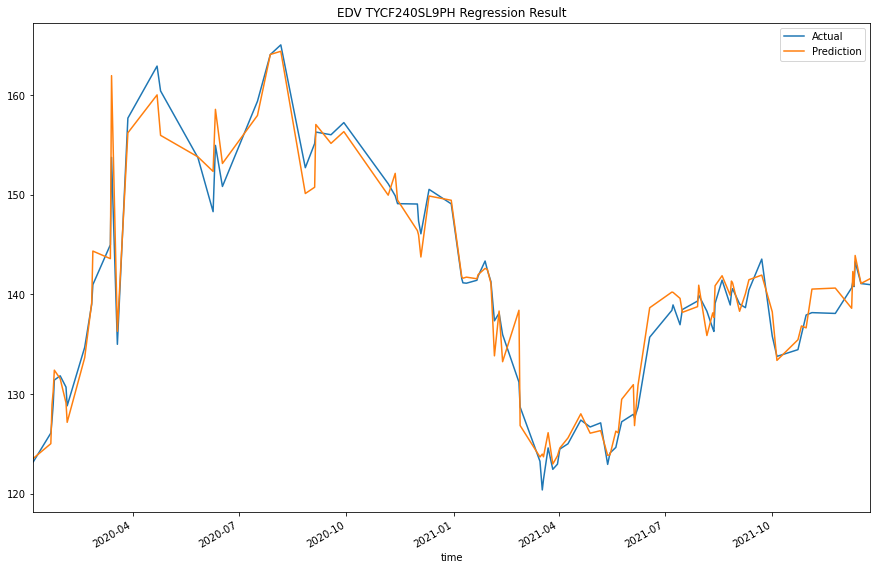

<Figure size 432x288 with 0 Axes>

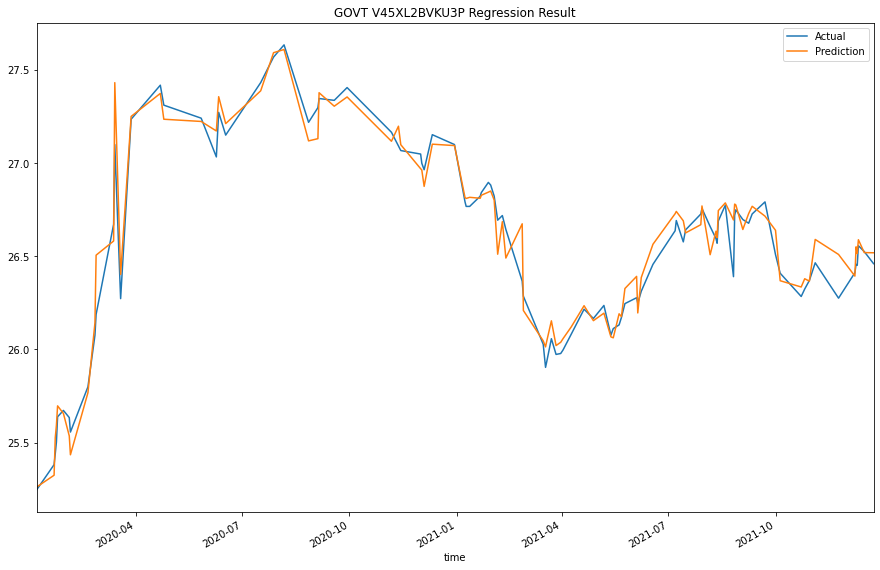

<Figure size 432x288 with 0 Axes>

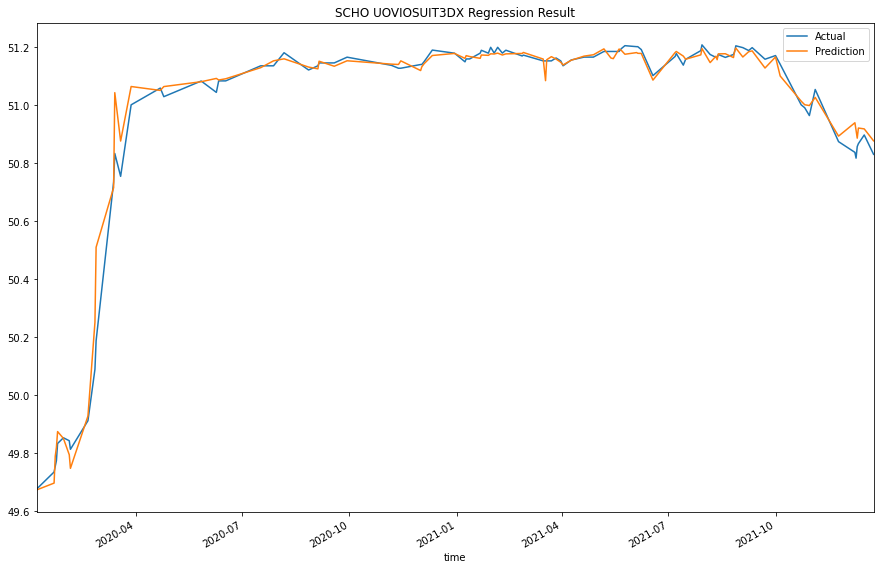

<Figure size 432x288 with 0 Axes>

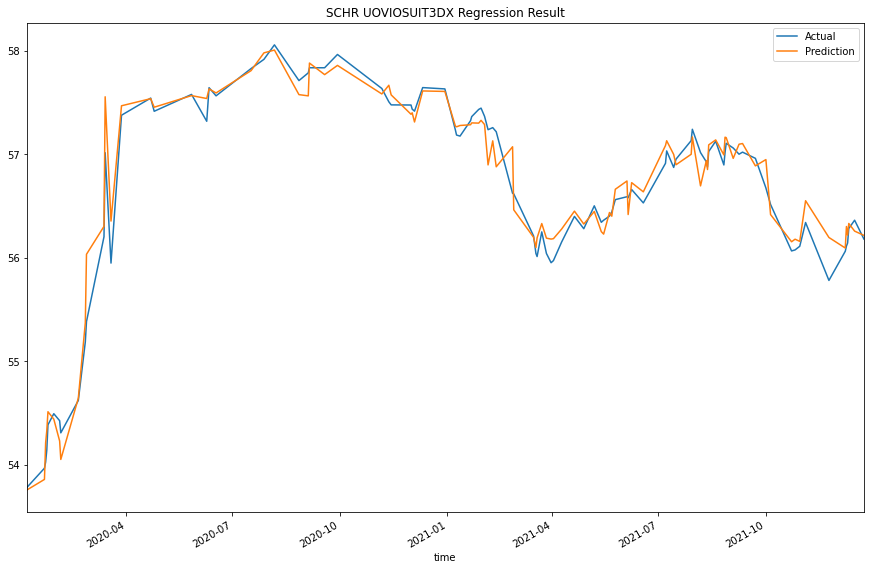

<Figure size 432x288 with 0 Axes>

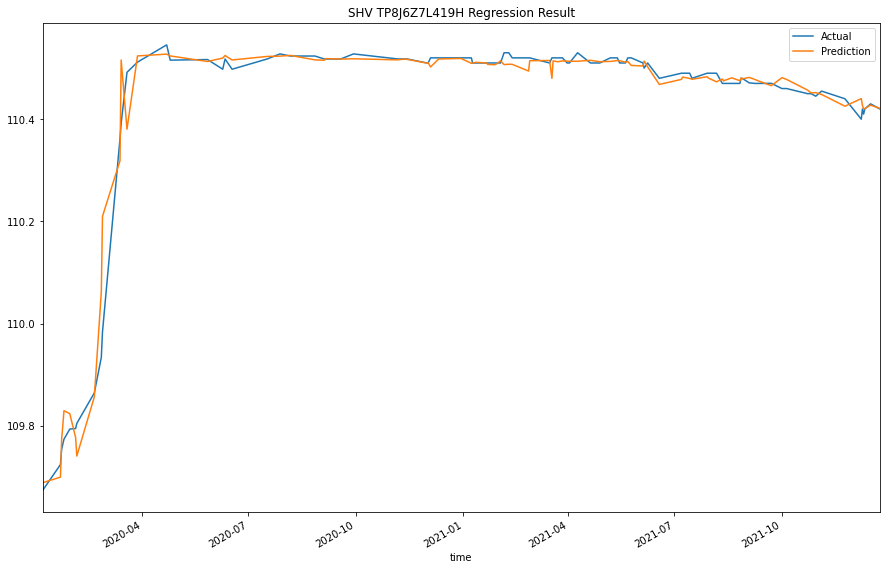

<Figure size 432x288 with 0 Axes>

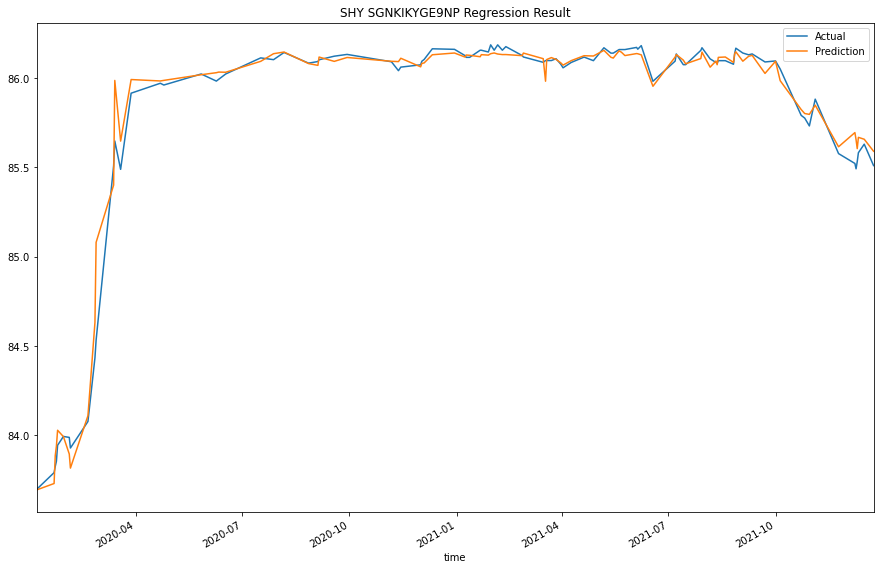

<Figure size 432x288 with 0 Axes>

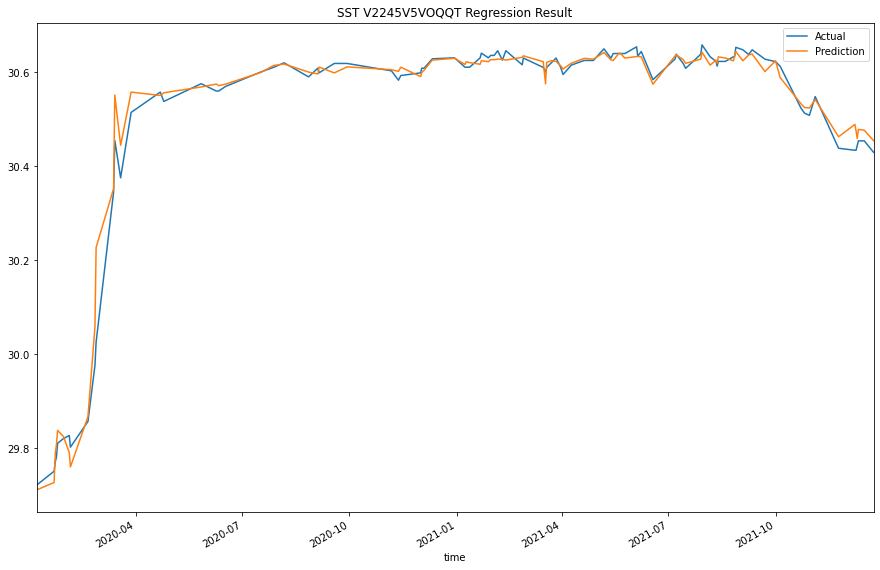

<Figure size 432x288 with 0 Axes>

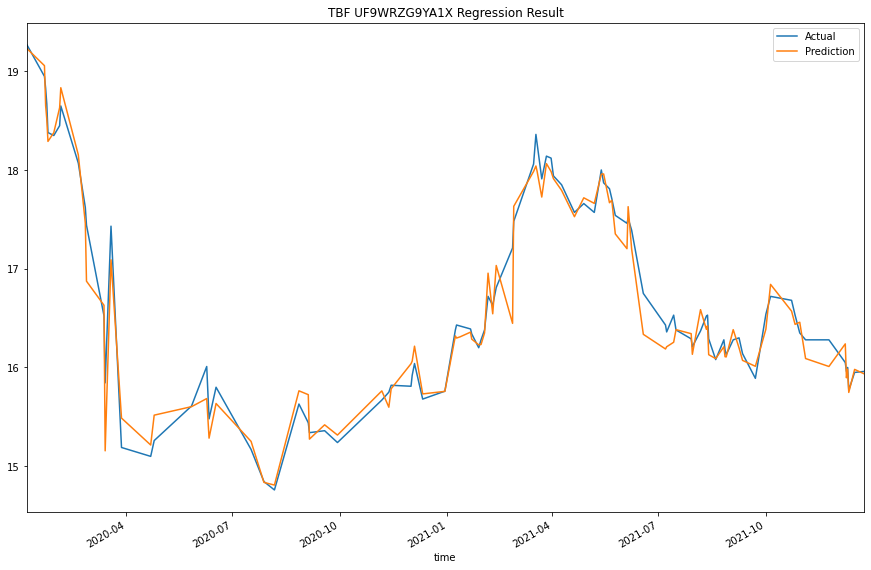

<Figure size 432x288 with 0 Axes>

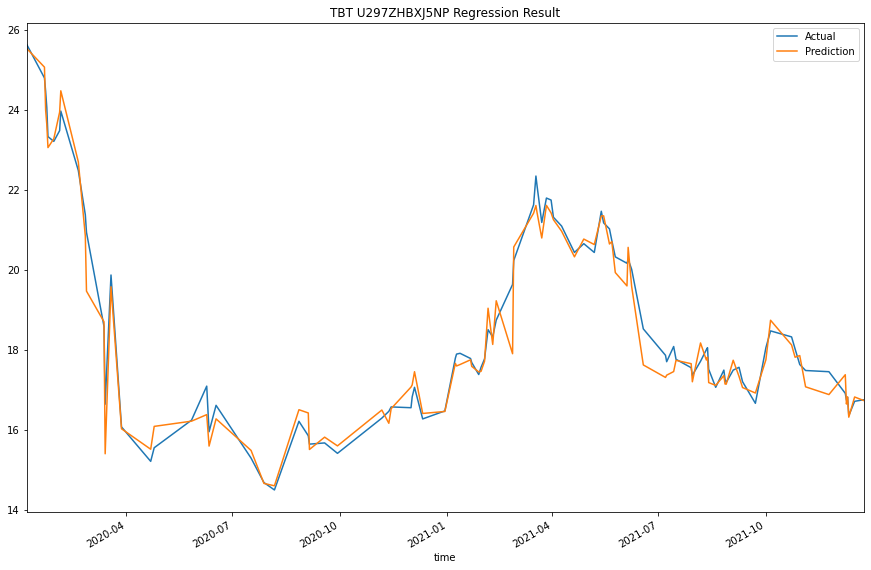

<Figure size 432x288 with 0 Axes>

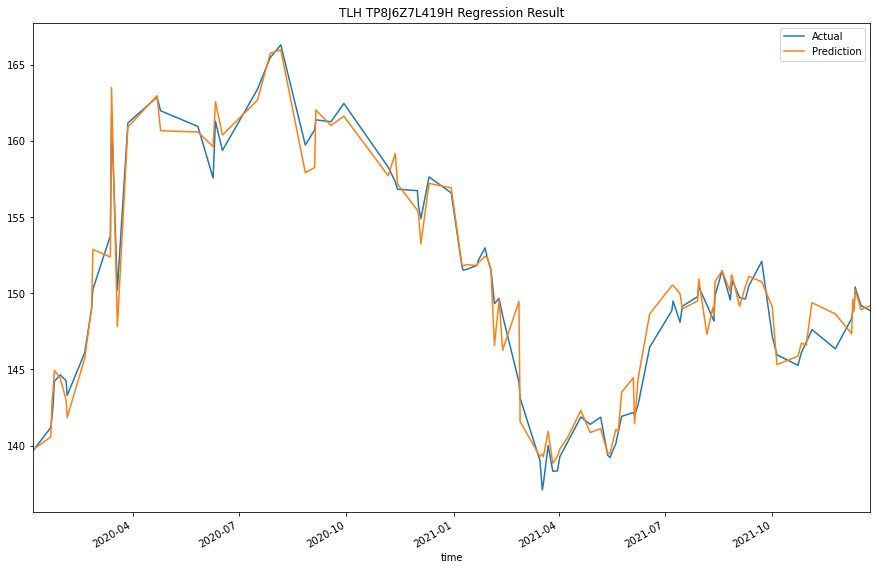

<Figure size 432x288 with 0 Axes>

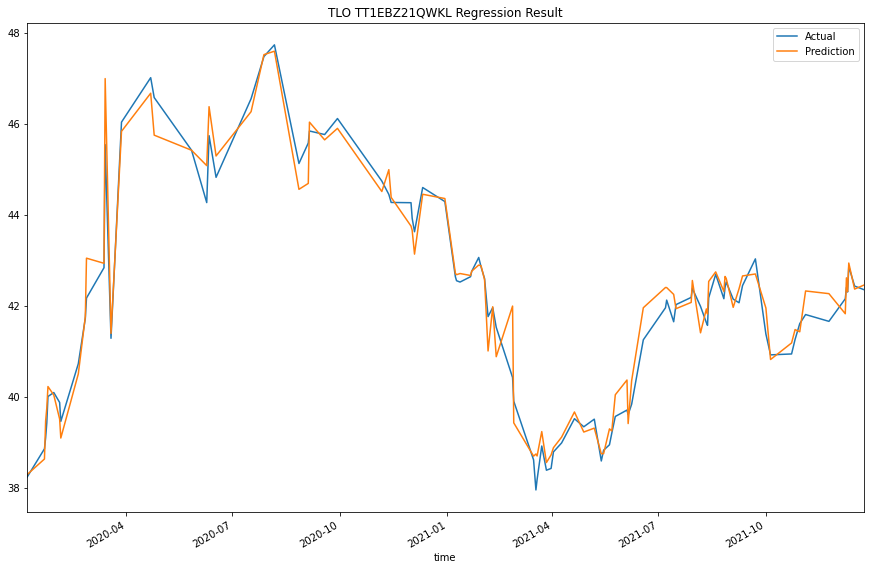

<Figure size 432x288 with 0 Axes>

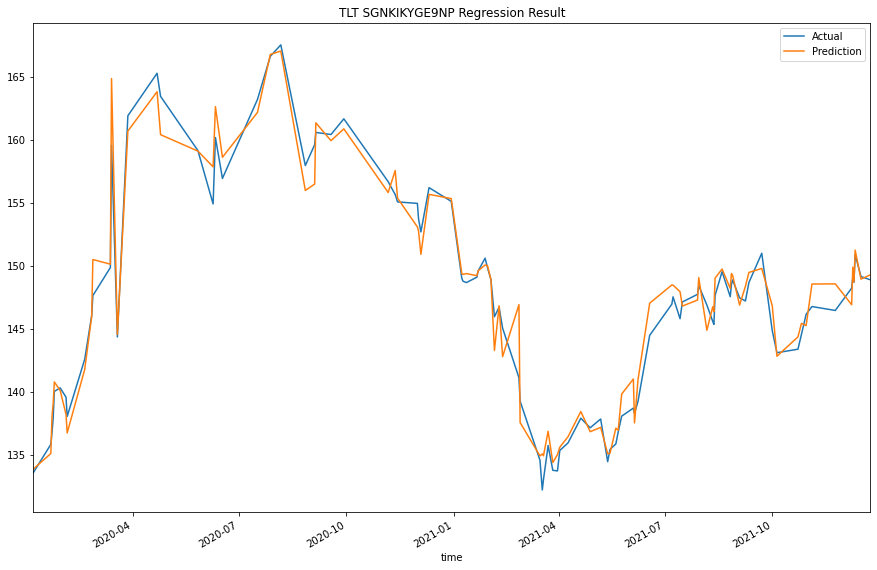

<Figure size 432x288 with 0 Axes>

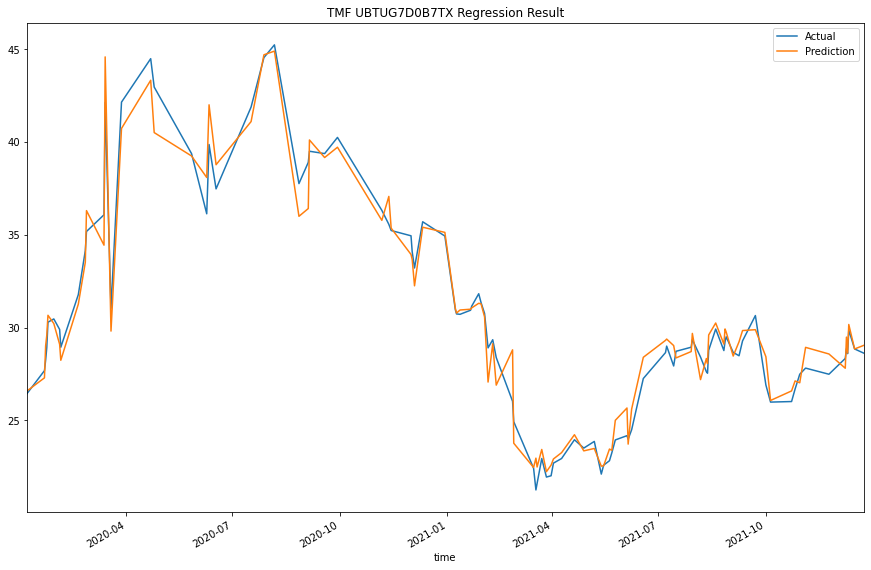

<Figure size 432x288 with 0 Axes>

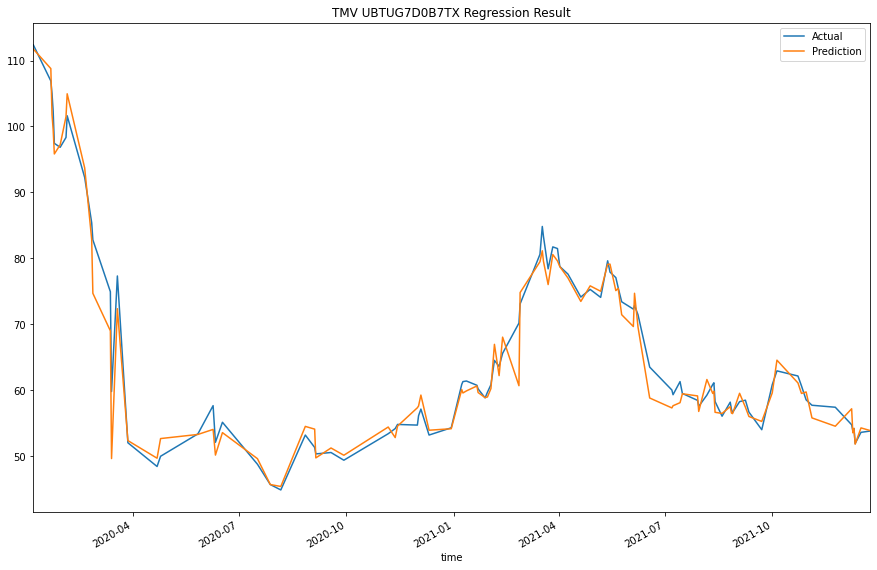

<Figure size 432x288 with 0 Axes>

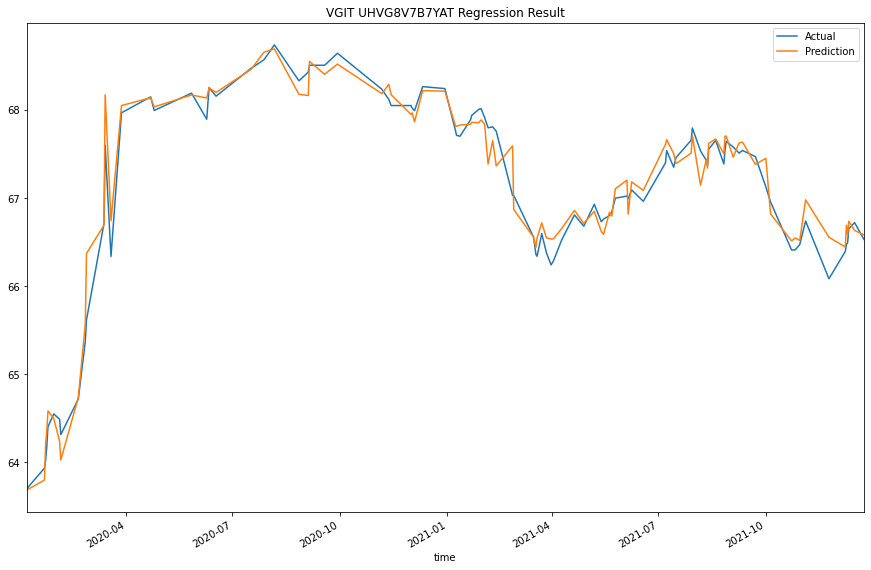

<Figure size 432x288 with 0 Axes>

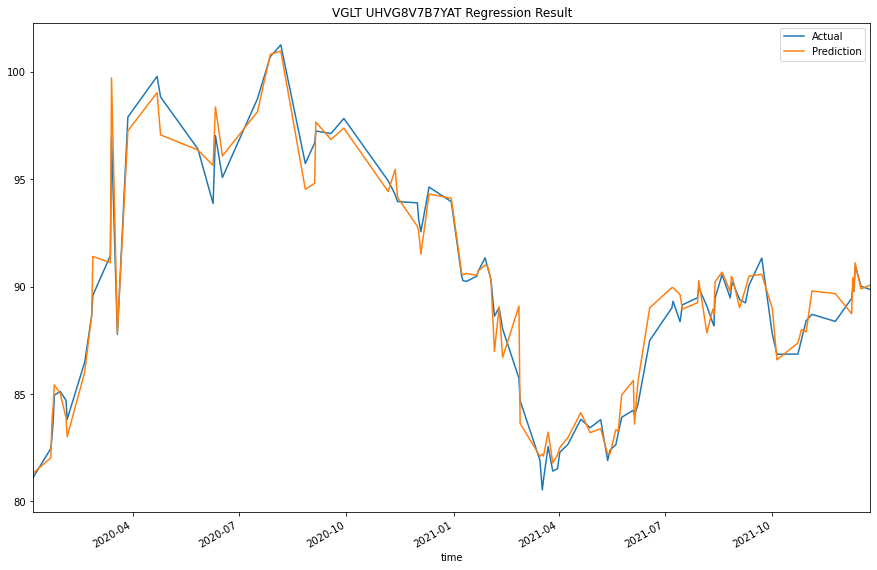

<Figure size 432x288 with 0 Axes>

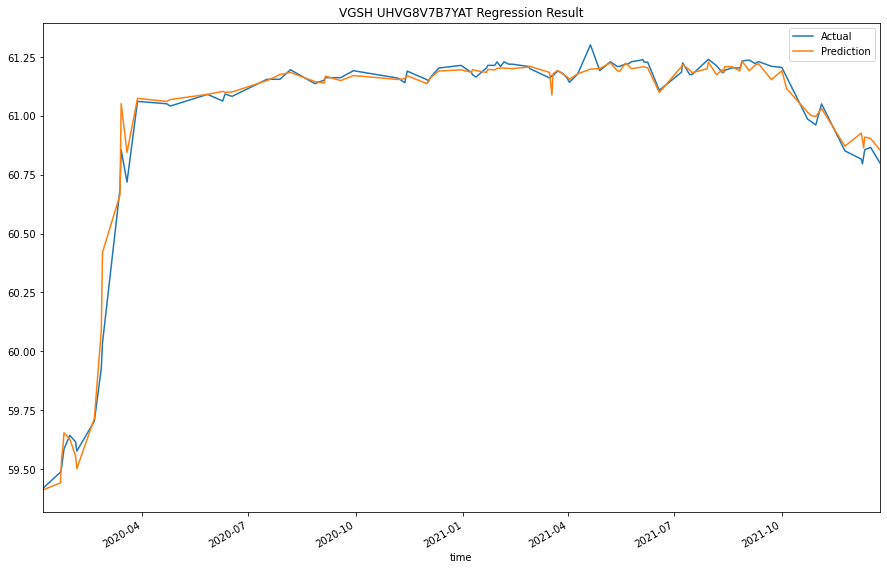

<Figure size 432x288 with 0 Axes>

In [4]:
# Predict the testing set
predictions = regressor.predict(X_test)

# Convert result into DataFrame
predictions = pd.DataFrame(predictions, index=y_test.index, columns=y_test.columns)
    
# Plot the result for comparison
for col in y_test.columns:
    plt.figure(figsize=(15, 10))

    y_test[col].plot(label="Actual")
    predictions[col].plot(label="Prediction")

    plt.title(f"{col} Regression Result")
    plt.legend()
    plt.show()
    plt.clf()